In [56]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

### Compute some statistics about species data

In [57]:
## get species text length
speciesFiles = os.listdir("./final_data/species/")
binomialName = []
speciesKey = []
textLenght = []
for file in speciesFiles:
    with open("./final_data/species/" + file, "r") as fp:
        fileContent = json.load(fp)
        binomialName.append(fileContent["binomial_name"])
        speciesKey.append(fileContent["species_key"])
        textLenght.append(fileContent["text_length"])
species_data = pd.DataFrame(list(zip(speciesKey, binomialName, textLenght)),columns =["species_key", "binomial_name", "text_lenght"])

In [58]:
## get species taxonomy
df = pd.read_json("./processed_data/species_data.json", orient="records")
df = df.drop("scientific_name", axis=1).drop_duplicates()
species_data = df.join(species_data.set_index("species_key"), on="species_key", how="inner")
df = None

In [59]:
## get species number of occurences
df = pd.read_json("./processed_data/species_habitats_records.json", orient="records").drop_duplicates()
df = pd.DataFrame(df["species_key"].value_counts())
df.columns=["observations_count"]
species_data = species_data.join(df, on="species_key", how="inner")
df = None

In [60]:
species_data.head()

,kingdom,phylum,class,order,family,genus,species,species_key,binomial_name,text_lenght,observations_count
8,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Solidago,Solidago canadensis,5389029,Solidago canadensis,4796,1461
100522,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,5352251,Robinia pseudoacacia,23580,1294
133592,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Erigeron,Erigeron annuus,3117449,Erigeron annuus,3823,1182
320430,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Trifolium,Trifolium repens,5358748,Trifolium repens,14238,143
323989,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus europaeus,3169131,Euonymus europaeus,5787,118


In [61]:
## Overall text length and obsercations count distributions
species_data.describe()

,species_key,text_lenght,observations_count
count,5.198000e+03,5198.000000,5198.000000
mean,4.049562e+06,4366.070027,38.058484
std,2.255535e+06,7832.387447,82.797309
min,1.013335e+06,79.000000,1.000000
25%,2.494764e+06,780.000000,3.000000
50%,3.049742e+06,2217.000000,12.000000
75%,5.342410e+06,4540.750000,40.000000
max,1.215520e+07,184067.000000,2146.000000


In [62]:
## Number of documented species per kingdom
pd.DataFrame(species_data["kingdom"].value_counts())

,kingdom
Animalia,2300
Plantae,2140
Fungi,743
Chromista,7
Protozoa,5
Bacteria,3


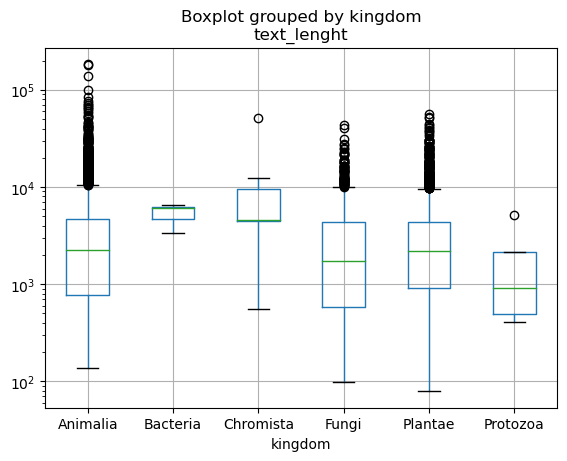

In [63]:
## Textlenght by kingom
ax = species_data.boxplot(column="text_lenght", by="kingdom")
ax.set_yscale("log")

In [64]:
## Total number of observations by kingdom
pd.DataFrame(species_data.groupby("kingdom")["observations_count"].sum())

,observations_count
kingdom,
Animalia,70459
Bacteria,3
Chromista,9
Fungi,5359
Plantae,121983
Protozoa,15


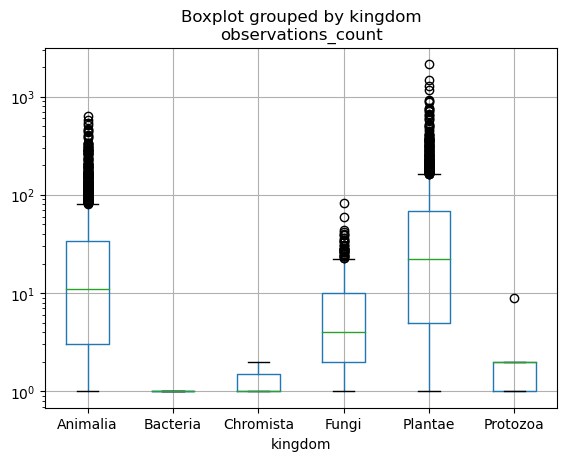

In [65]:
## Species number of observations distribution by kingdom
ax = species_data.boxplot(column="observations_count", by="kingdom")
ax.set_yscale("log")

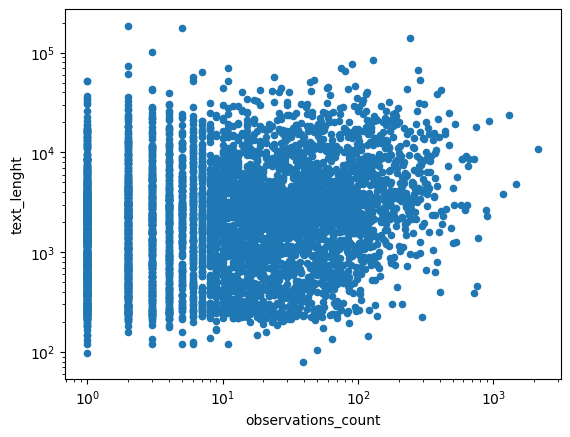

In [66]:
## Text length to observation count relation
ax = species_data.plot.scatter(x="observations_count", y="text_lenght")
ax.set_yscale("log")
ax.set_xscale("log")

### Compute statistics about inputs and targets

In [107]:
input_target_pairs = pd.read_json("./final_data/all_data.json", orient="records")
input_target_pairs.head(10)

,zone_id,maps_based_class,split,shape_area,species_key,species_count,species_based_class,num_classes
0,9,45,train,665918.930058,"[3032837, 3170807, 3105433, 2883073]",4,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",25
1,10,43,train,2991.243434,[4299368],1,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",27
2,13,66,train,230749.174683,[2891147],1,"[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...",32
3,26,43,train,400775.100939,"[5137582, 7799370]",2,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",19
4,29,54,train,101384.855230,"[8207244, 5352367, 3170807]",3,"[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",23
5,37,43,train,10094.769110,[5405976],1,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",33
6,38,66,train,132550.544072,[5410886],1,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, ...",22
7,61,43,train,46156.868586,"[7270427, 8152305, 2482553, 5231240, 2494422]",5,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, ...",14
8,62,43,train,267678.647708,[5769191],1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
9,65,44,train,91369.895171,[8207244],1,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32


In [108]:
input_target_pairs.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zone_id,maps_based_class,shape_area,species_count,num_classes
count,25963.000000,25963.000000,2.596300e+04,25963.000000,25963.000000
mean,48656.067789,50.621615,1.386739e+05,3.762778,18.324924
std,27950.578900,23.941659,5.124324e+05,3.286255,8.450413
min,9.000000,2.000000,8.114492e+00,1.000000,1.000000
10%,10365.600000,11.000000,4.086319e+03,1.000000,6.000000
20%,21574.800000,34.000000,9.328835e+03,1.000000,11.000000
30%,26934.000000,43.000000,1.732712e+04,1.000000,14.000000
40%,36129.400000,45.000000,2.960359e+04,2.000000,16.000000
50%,49333.000000,45.000000,4.654735e+04,2.000000,19.000000
60%,59435.200000,60.000000,7.053005e+04,3.000000,21.000000


In [109]:
## Fraction of the area covered by the dataset
import geopandas as gpd
study_area = gpd.read_file("./raw_data/study_area/study_area.shp")
total_area = study_area.area[0]
dataset_area = input_target_pairs["shape_area"].sum()
dataset_area
difference = total_area-dataset_area
fraction = dataset_area/total_area
fraction
print(f"Precentage of zones covered with observations : {fraction:.2%}")

Precentage of zones covered with observations : 61.44%


Text(0, 0.5, 'Number of occurences')

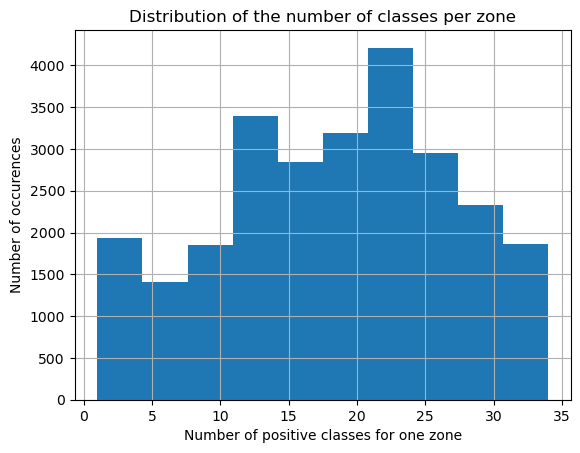

In [110]:
## Disribution of number of classes
plt.figure()
input_target_pairs["num_classes"].hist(bins=10)
plt.title("Distribution of the number of classes per zone")
plt.xlabel("Number of positive classes for one zone")
plt.ylabel("Number of occurences")

In [111]:
## Relationship between number of species and number of classes
corr = input_target_pairs["species_count"].corr(input_target_pairs["num_classes"])
print(f"The correlation between the number of species and the number of classes for a given zone is : {corr:.2%}")

The correlation between the number of species and the number of classes for a given zone is : -69.15%


In [112]:
## Occurence rate of classes accross samples
import torch
contingency = torch.tensor(input_target_pairs["species_based_class"].tolist())
occurence_rates = pd.DataFrame()
occurence_rates["class"] = pd.read_json("./final_data/habitats_keys.json", orient="records")["class"]
occurence_rates["rate"] = contingency.sum(dim=0).div(contingency.size(0)).tolist()
pd.DataFrame(occurence_rates.set_index("class").describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

,rate
count,37.000000
mean,0.495268
std,0.284169
min,0.029157
10%,0.098201
20%,0.214636
30%,0.329053
40%,0.348573
50%,0.430574
60%,0.652559


### Cooccurences of classes for species

In [89]:
import torch
import torch.nn.functional as F
import pandas as pd
level = "type"
## Load data
species_habitats_records = pd.read_json("./processed_data/species_habitats_records.json", orient="records")
habitats_data = pd.read_json("./processed_data/habitats_data.json", orient="records").set_index("TypoCH_NUM")
## Merge sources
species_habitats_records = species_habitats_records.join(habitats_data[["Class","Group_","Type"]], on="TypoCH_NUM", how="left")
species_habitats_records = species_habitats_records.rename(columns={"Class": "class", "Group_":"group", "Type": "type"})
## Get unique values of classes
unique_classes = species_habitats_records[level].unique()
## Sort "alphabetically"
unique_classes = list(map(str, unique_classes))
unique_classes.sort()
unique_classes = list(map(int, unique_classes))

In [90]:
def get_onehots(entry, unique_classes):
    """Retrieve one_hot encodings"""
    x = [unique_classes.index(c) for c in entry]
    return F.one_hot(torch.tensor(x), num_classes=len(unique_classes)).sum(dim=0).tolist()

def get_species_classes(records, unique_classes):
    """Get one_hot encoded classes for each species"""
    species_classes = records.groupby("species_key")[level].unique().reset_index().rename(columns={level:"classes"})
    species_classes["classes_onehot"] = species_classes["classes"].apply(lambda x : get_onehots(x, unique_classes))
    return species_classes

In [91]:
species_habitats_records.head()

,zone_id,grid_id,TypoCH_NUM,species_key,shape_area,canton,split,class,group,type
0,96603,1537,454,2891147,102800.130038,VD,train,4,45,454
1,95033,1625,625,3170040,15280.189843,VD,train,6,62,625
2,94466,1713,452,2891147,69785.151723,VD,train,4,45,452
3,94462,1713,453,5371685,104539.091134,VD,train,4,45,453
4,94901,1804,625,1703827,36810.089390,VD,train,6,62,625


In [92]:
get_species_classes(species_habitats_records, unique_classes).set_index("species_key")

,classes,classes_onehot
species_key,,
1013335,"[4, 33, 625, 662, 451, 66, 454, 41]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1013651,[451],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1035167,"[4, 71, 624, 66, 634, 665, 34, 600, 92, 421, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1035185,"[424, 611, 82, 621, 454, 451, 624, 4, 634, 600...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1035194,"[539, 71, 33, 454, 662, 92, 664, 4, 34, 600, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
11049437,[82],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11071158,"[621, 421]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11106107,"[82, 432, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [93]:
idx = get_species_classes(species_habitats_records, unique_classes).set_index("species_key").index
idx

Int64Index([ 1013335,  1013651,  1035167,  1035185,  1035194,  1035195,
             1035204,  1035208,  1035216,  1035231,
            ...
            10986555, 10994058, 11007246, 11033848, 11048070, 11049437,
            11071158, 11106107, 11986045, 12155203],
           dtype='int64', name='species_key', length=5198)

In [94]:
out = pd.DataFrame(get_species_classes(species_habitats_records, unique_classes).set_index("species_key")["classes_onehot"].tolist(), columns=unique_classes).astype(int)
out.index = idx
out.head()

,11,12,2,21,212,221,222,223,231,232,...,816,82,823,9,92,93,932,933,934,94
species_key,,,,,,,,,,,,,,,,,,,,,
1013335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1035167,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1035185,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1035194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
import numpy as np
cooccurence = out.T.dot(out)
cooccurence = cooccurence/len(idx)
np.fill_diagonal(cooccurence.values, 0)

<Axes: title={'center': 'Cooccurences of classes accross species (fraction of total number of species) \n without auto cooccurence (diagonal is set to 0)'}>

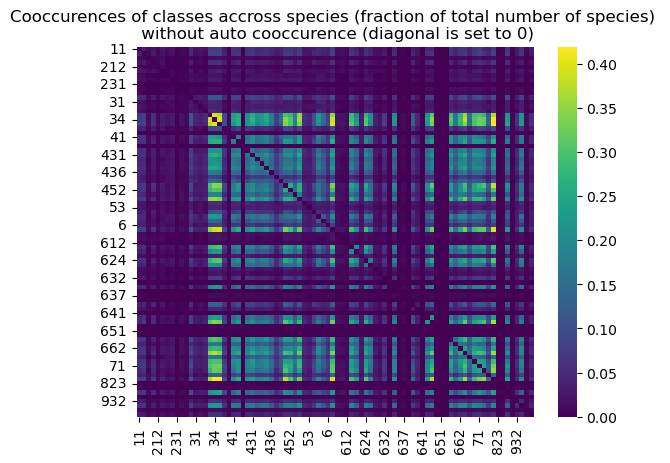

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
plt.title("Cooccurences of classes accross species (fraction of total number of species) \n without auto cooccurence (diagonal is set to 0)")
sns.heatmap(cooccurence, cmap="viridis")

In [88]:
## Splits relative size
input_target_pairs["split"].value_counts()

train    15504
test      7934
val       2525
Name: split, dtype: int64

In [ ]:
## Available text lenght per zone and unique species number
subset = species_data[["speciesKey", "textLenght"]].set_index("speciesKey")
zones = input_target_pairs.drop_duplicates().join(subset, on="speciesKey", how="inner")
zones = zones.groupby(["zoneID","TypoCH_NUM","shapeArea","canton"]).agg({"speciesKey":"count","textLenght":"sum"}).reset_index()
zones = zones.rename(columns={"speciesKey":"speciesCount"})
zones.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zoneID,TypoCH_NUM,shapeArea,speciesCount,textLenght
count,22787.000000,22787.000000,2.278700e+04,22787.000000,2.278700e+04
mean,48494.031290,442.163602,1.314472e+05,8.899592,5.714573e+04
std,28218.470841,732.487229,2.183925e+06,68.208714,3.311801e+05
min,9.000000,2.000000,8.114492e+00,1.000000,1.050000e+02
10%,9658.600000,12.000000,3.617861e+03,1.000000,2.126000e+03
20%,21022.200000,41.000000,8.015701e+03,1.000000,3.501000e+03
30%,26733.800000,66.000000,1.453556e+04,1.000000,5.631000e+03
40%,35618.200000,94.000000,2.454930e+04,1.000000,8.656400e+03
50%,48877.000000,432.000000,3.869770e+04,2.000000,1.244000e+04
60%,59375.800000,452.000000,5.890358e+04,3.000000,1.827480e+04


In [ ]:
## Number of occurence of habitats
habitatsData = pd.read_json("./WikiSpeciesHabitats/habitatsData.json", orient="records")
subset = pd.DataFrame(zones.TypoCH_NUM.value_counts())
subset.columns = ["occurencesCount"]
habitatsData = habitatsData.join(subset, on="TypoCH_NUM", how="left")
habitatsData = habitatsData.fillna(0)
habitatsData.head(10)

,TypoCH_NUM,TypoCH_DE,TypoCH_FR,TypoCH_IT,TypoCH_Sci,Class,Group_,Type,Source,occurencesCount
0,1,1 Gewässer,1 Eaux libres,1 Ambienti acquatici,0,1,1,1,1,0.0
1,11,1.1 Stehende Gewässer,1.1 Eaux calmes,1.1 Acque ferme,0,1,11,11,1,168.0
2,12,1.2 Fliessgewässer,1.2 Eaux courantes,1.2 Acque correnti,0,1,12,12,1,488.0
3,2,2 Ufer und der Feuchtgebiete,2 Rivages et lieux humides,2 Rive e luoghi umidi,0,2,2,2,1,21.0
4,21,2.1 Ufer mit Vegetation,2.1 Rivages avec végétation,2.1 Rive con copertura vegetale,0,2,21,21,1,132.0
5,211,2.1.1 Moortümpelgesellschaft,2.1.1 Dépression inondée à utriculaires,2.1.1 Depressioni allagate con Erba-vescica,Sphagno-Utricularion,2,21,211,1,0.0
6,212,2.1.2 Röhricht,2.1.2 Roselière,2.1.2 Canneti,0,2,21,212,2,0.0
7,2121,2.1.2.1 Stillwasser-Röhricht,2.1.2.1 Roselière lacustre,2.1.2.1 Canneti lacustri,Phragmition,2,21,212,2,0.0
8,2122,2.1.2.2 Flussufer- und Landröhricht,2.1.2.2 Roselière terrestre,"2.1.2.2 Canneti terrestri, ripariali",Phalaridion,2,21,212,2,17.0
9,22,2.2 Flachmoore,2.2 Bas-marais,2.2 Paludi (torbiere basse),0,2,22,22,2,0.0


In [ ]:
## At the TypoCH_NUM level
habitatsData.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,TypoCH_NUM,Class,Group_,Type,Source,occurencesCount
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,557.794872,5.153846,51.474359,400.128205,3.724359,146.070513
std,888.226669,2.188397,23.863712,293.086483,2.948097,255.823531
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10%,28.000000,2.000000,21.500000,28.000000,1.000000,0.000000
20%,60.000000,3.000000,25.000000,60.000000,2.000000,0.000000
30%,211.500000,4.000000,42.000000,152.500000,2.000000,0.000000
40%,401.000000,5.000000,45.000000,250.000000,2.000000,0.000000
50%,451.500000,5.000000,53.000000,432.500000,3.000000,6.000000
60%,543.000000,6.000000,61.000000,535.000000,3.000000,33.000000


In [ ]:
## At the Type level
pd.DataFrame(habitatsData.groupby("Type")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Type,occurencesCount
count,148.000000,148.000000
mean,403.297297,153.966216
std,296.006997,260.352467
min,1.000000,0.000000
10%,24.700000,0.000000
20%,53.400000,0.000000
30%,93.100000,0.000000
40%,251.800000,0.000000
50%,434.500000,13.500000
60%,537.200000,61.800000


In [ ]:
## At the Group level
pd.DataFrame(habitatsData.groupby("Group_")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Group_,occurencesCount
count,46.000000,46.000000
mean,42.195652,495.369565
std,27.922607,647.776826
min,1.000000,0.000000
10%,5.500000,0.000000
20%,11.000000,10.000000
30%,23.500000,44.500000
40%,33.000000,200.000000
50%,42.500000,278.000000
60%,51.000000,403.000000


In [ ]:
## At the Class level
pd.DataFrame(habitatsData.groupby("Class")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Class,occurencesCount
count,9.000000,9.000000
mean,5.000000,2531.888889
std,2.738613,2664.027001
min,1.000000,485.000000
10%,1.800000,621.800000
20%,2.600000,777.800000
30%,3.400000,880.200000
40%,4.200000,1017.800000
50%,5.000000,1441.000000
60%,5.800000,1997.800000


### See how species distribution differ in different habitats